**Исследование объявлений о продаже квартир**

# Цель иследования.

Проведем исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов.

# Обзор данных.

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
try:
    data = pd.read_csv(
        '...\\real_estate_data.csv'
    )
except:
    data = pd.read_csv('.../real_estate_data.csv')

# вывод всех столбцов, независимо от их количества.
pd.set_option('display.max_columns', None)

# выведем датафрейм на экран
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Необходимо применить аргумент `sep` и `decimal` при вызове функции и убрать знак табуляции.


In [3]:
try:
    data = pd.read_csv(
        '..\\real_estate_data.csv', 
        sep='\t' 
    )
except:
    data = pd.read_csv(
        '.../real_estate_data.csv', 
        sep='\t'
    )

# выведем датафрейм на экран
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


## Выведем и изучим общую информацию о полученном датафрейме.

In [4]:
data_len_stock = len(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В представленной таблице есть колонки, которые имеют следующее значение:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


После изучения общей информации о данных ясно следующее:

- количество ненулевых (non-null) значений в столбцах *ceiling_height*, *floors_total*, *living_area*, *is_apartment*, *kitchen_area*, *balcony*, *locality_name*, *airports_nearest*, *cityCenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest* и *days_exposition* отличается, присутствуют пропуски;
- в колонках *total_images*, *last_price*, *rooms*, *floors_total*, *floor*, *balcony*, *airports_nearest*, *cityCenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest* и *days_exposition* значения представленны в формате `object`, а должны быть в виде целого числа;
- в колоках *total_area*, *ceiling_height*, *living_area* и *kitchen_area* значения представленны в формате `object`, а должны быть в виде десятичного числа;
- в колонке *first_day_exposition* данные о дате представлены в виде `object`, а должны быть в формате даты;
- название столбцов *cityCenters_nearest*, *parks_around3000*, *ponds_around3000* нужно привести к змеиному регистру;
- название столбца *cityCenters_nearest* нужно привести к строчному написанию букв;
- в колонке *locality_name* присутствуют дупликаты;
- в колонках *floors_total*, *ceiling_height* и *kitchen_area* встречаются аномальные значения.



## Построим гистограмму для всех числовых столбцов

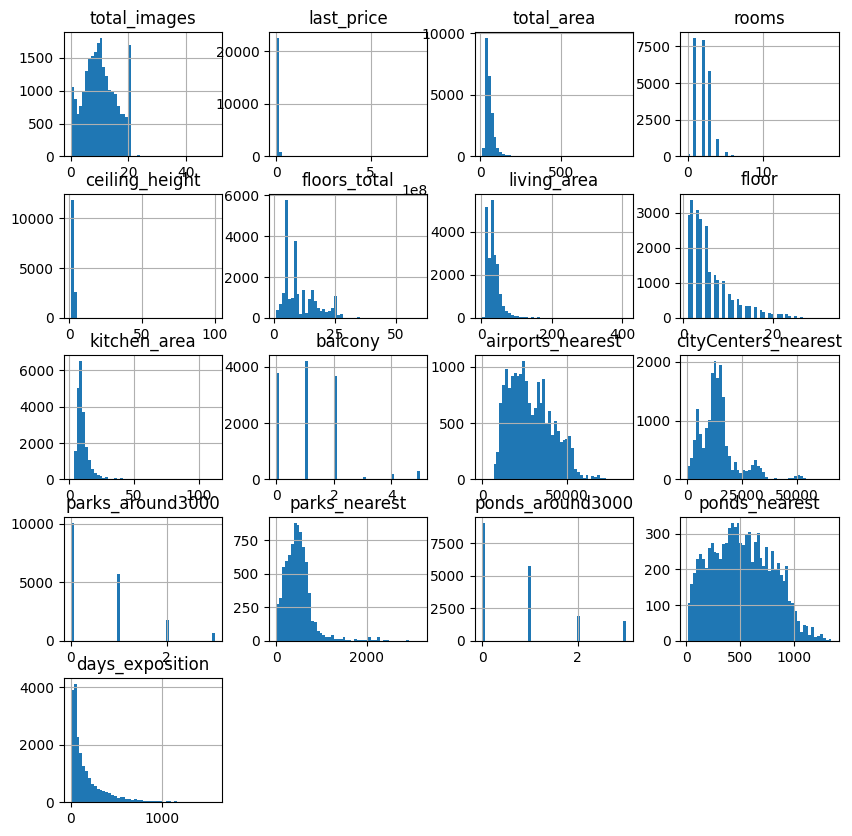

In [6]:
data.hist(bins=50, figsize=(10, 10))
plt.show()

По гистограмме *total_image* видно, что объявления с количеством изображений от 5 до 10 встречается чаще всего. По гистограмме *rooms* видно, что больше всего объявлений о продаже квартир с 3 и 4 комнатами. Также по гистограмме на исходных данных ясно, что лидирут объявления о продаже квартир на 2-5 этажах. 

Вывод: есть важный факт, представленные данные сырые и содержат различные ошибки, пропуски и аномалии, которые могут исказить рзультаты исследования. Необходимо выполнить предобработку данных для качественного выполнения проекта. 

# Предобработка данных.

Подготовка данных для анализа называется предобработкой. Нужно оценить масштаб найденных проблем и 
устранить их. Предобработка следует принципу GIGO (от англ. garbage in — garbage out, буквально «мусор на входе — мусор на выходе»). Это значит, что при ошибках во входных данных даже правильный алгоритм работы приведёт к неверным результатам. Так же нужно помнить об законе экономии, который называется **Бри́тва О́ккама**. В нем говорится следующее: *Не следует множить сущее без необходимости.* Суть принципа: совершенство должно быть простым. Если какого-то результата можно достичь с привлечением сущностей A, B и C либо другим путём с привлечением A, B, С и D — надо выбирать первый путь. В плане программирования это значит, что не следут создавать промежуточные переменные, которые не пригодяться в дальнейшем.


## Рассмотрим типы данных в каждом столбце

На этапе предобработки для комфортной работы с данными необходимо отформатировать данные в нужный нам тип.



### Найдем столбцы, в которых нужно изменить тип данных

Мы выяснили, в каких колонках есть проблемы с форматом данных. Это столбцы: 

- в колонках *total_images*, *last_price*, *rooms*, *floors_total*, *floor*, *balcony*, *airports_nearest*, *cityCenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest* и *days_exposition* значения представленны в формате `object`, а должны быть в виде целого числа;
- в колоках *total_area*, *ceiling_height*, *living_area* и *kitchen_area* значения представленны в формате `object`, а должны быть в виде десятичного числа;
- в колонке *first_day_exposition* данные о дате представлены в виде `object`, а должны быть в формате даты;

При изменении формата данных используем числа 32 бит, для экономии памяти и быстродействия.



### Форматирование в datatime

Изменим тип данных в колонке *first_day_exposition*.



In [9]:
# используем метод to_datetime()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Округление значений в столбцах

Для более лаконичного отображения значений в таблице округлим десятичные числа до двух знаков после запятой в колонках *total_area*, *living_area* и *kitchen_area*.



In [12]:
# используем метод astype для группового форматирования
data[['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 
      'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 
      'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 
      'total_images', 'last_price', 'rooms', 'floors_total', 'floor', 'balcony']] = (
    data[['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 
      'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 
      'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',
      'total_images', 'last_price', 'rooms', 'floors_total', 'floor', 'balcony']]
    .astype('float32')
)

In [13]:
# используем метод rename() для замены
data = data.rename(
    columns={'cityCenters_nearest': 'city_centers_nearest', 
             'parks_around3000': 'parks_around_3000', 
             'ponds_around3000': 'ponds_around_3000'}
)

In [14]:
# используем метод astype для группового форматирования
data[['total_images', 'last_price', 'rooms', 'floors_total', 'floor', 'balcony']] = (
    data[['total_images', 'last_price', 'rooms', 'floors_total', 'floor', 'balcony']]
    .astype('float32')
)

## Найдём и изучим пропущенные значения в столбцах.

### Определим, в каких столбцах есть пропуски.

Выведем количество пропущенных значений для каждого столбца, комбинируя 2 метода.


In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски присутствуют в 14 столбцах.



### Заполним пропущенные значения там, где это возможно. 

Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставим пропуски. Пропущенные значения — тоже важный сигнал, который нужно учитывать. В первую очередь исправим столбец *floors_total*. Количество пропусков в нем 86, всего 0,3% от общего количесва объяявлений, поэтому удалим строки из данных.



In [20]:
data = data.dropna(subset=['floors_total'])

В столбце *ceiling_height* есть пропущенные значения, он отвечает за высоту потолков. Для заполнения пропусков используем категоризацию квартир по района города и заменим пропуски медианным значением. Для замены используем метод `fillna()`. Далее перезаписываем датафрейм с заданными инструкциями.



In [21]:
# в аргументе метода сочетаются методы группировки и трансформации.
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))

# проверка результата
data['ceiling_height'].isna().sum()

154

In [22]:
# ззамена пропусков, не попадающих в группировку и агрегацию медианным значением высоты потолков
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

В столбце *living_area* есть пропущенные значения, он отвечает за жилую площадь в м². Для заполнения пропусков используем категоризацию квартир по количеству комнат и заменим пропуски медианным значением. Для замены используем метод `fillna()`. Далее перезаписываем датафрейм с заданными инструкциями. Пропуски в этом столбце возможно появились из-за того, что продавец не заполнил поле.


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  float32       
 1   last_price            23613 non-null  float32       
 2   total_area            23613 non-null  float32       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  float32       
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  float32       
 7   living_area           21743 non-null  float32       
 8   floor                 23613 non-null  float32       
 9   is_apartment          2775 non-null   object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float32       
 13  balcony              

In [24]:
# в аргументе метода сочетаются группировка и трансформация
data['living_area'] = (
    data['living_area']
    .fillna(data.groupby('rooms')['living_area'].transform('median'))
)

В столбце *is_apartment* есть пропущенные значения. В нем содержится информация, которая говорит о том, является ли квартира аппартаментами или нет. Данный столбец заполнял продавец, поэтому наличие пропуска означает, что квартира не является аппартаментами. Для замены используем метод `fillna()`. Далее перезаписываем датафрейм с заданными инструкциями.



In [123]:
# пропуск в строке означает False
pd.set_option('future.no_silent_downcasting', True)
data['is_apartment'] = data['is_apartment'].fillna(False)

В столбце *kitchen_area* есть пропущенные значения, он отвечает за площадь кухни в м². Для заполнения пропусков используем категоризацию квартир по районам и заменим пропуски медианным значением. Для замены используем метод `fillna()`. Далее перезаписываем датафрейм с заданными инструкциями. Пропуски в этом столбце появились появились из-за того, что продавец не заполнил поле.


In [26]:
# в аргументе метода сочетаются группировка и трансформация
data['kitchen_area'] = (
    data['kitchen_area']
    .fillna(data.groupby('locality_name')['kitchen_area'].transform('median'))
)

In [27]:
# проверим результат
print(data['kitchen_area'].isna().sum())
len(data.query('total_area*0.9 <= (living_area + kitchen_area)'))

28


1100

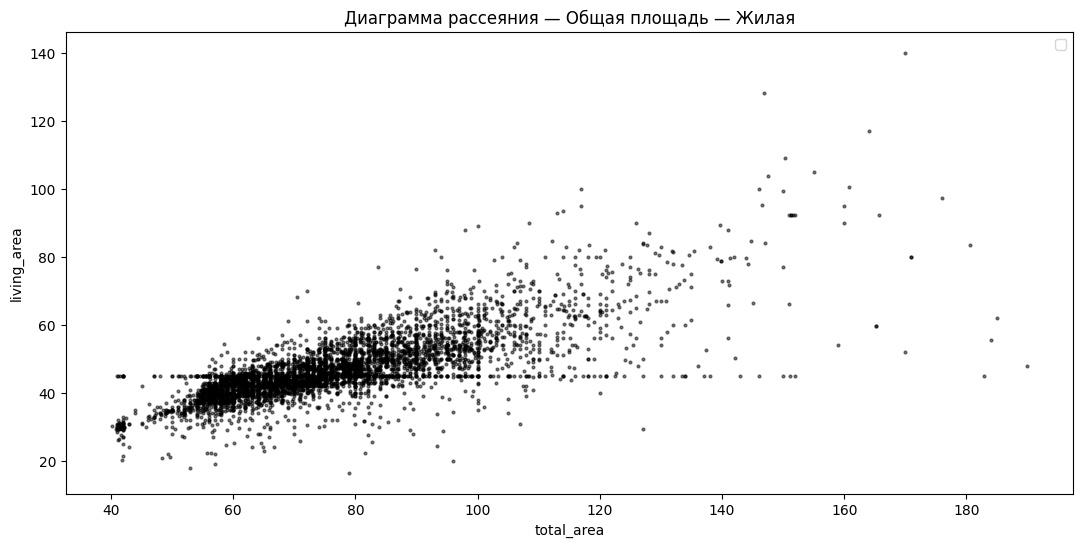

In [130]:
# проверим аномалии
(
    data[data['rooms'] == 3]
    .query('total_area < 201 and last_price < 25_000_000')
    .plot(kind='scatter',
          y='living_area',
          x='total_area',
          alpha=0.5, 
          subplots=True,
          figsize=(13,6),
          c = 'black',
          s = 4)
)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая')
plt.show()

После замены пропусков методом `fillna()` в столбце *kitchen_area* остались пропуски (аномалии, прямая неестественная для облака линия), которые не попали в группировку. Поэтому заменим их другим способом. 


In [29]:
# срез данных для наглядности
data.loc[:, ['rooms', 'studio', 'open_plan', 'kitchen_area']].query('rooms == 0 and studio == True').head()

,rooms,studio,open_plan,kitchen_area
144,0.0,True,False,10.385
440,0.0,True,False,9.900
608,0.0,True,False,10.800
697,0.0,True,False,10.440
716,0.0,True,False,10.800


В оставшихся объявлениях в колонках *studio* присутствует значение `True`, и в *open_plan* присутствует значение `True`. Предположим, что продавец студии не указал площадь кухни, потому что она объеденена с общей комнатой. И продавец квартиры с открытой планировкой тоже не указал прощадь кухни, так как ее нет. Также в колонке *rooms* указано количество комнат 0, но студия сама по себе является комнатой. Значит нужно заменить пропуски в *kitchen_area* нулем, а в колонке *rooms* нули на еденицы для студий.



In [30]:
# замена пропусков для kitchen_area
data['kitchen_area'] = data['kitchen_area'].fillna(0)

# замена значений в rooms с помощью сложного условия и логического выражения
rooms_one = (data['rooms'] == 0) & (data['studio'] == True)
data.loc[rooms_one, 'rooms'] = 1

В столбце *balcony* есть пропущенные значения. В нем содержится информация, которая указывает на количество балконов в квартире. Данный столбец заполнял продавец, поэтому наличие пропуска означает, что поле пропущено и балкона нет. Для замены используем метод `fillna()`. Далее перезаписываем датафрейм с заданными инструкциями.



In [31]:
data['balcony'] = data['balcony'].fillna(0)

Следующим шагом исправим столбец *locality_name*. Количество пропусков в нем 96, всего 0,3% от общего количесва объявлений, поэтому удалим строки из данных. Пропуски могли появиться из-за того, что продавец не указал населенный пункт.



In [32]:
data = data.dropna(subset=['locality_name'])

В столбцах *airports_nearest*, *city_centers_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest* есть пропущенные значения, они отвечают за расстлояние до определенного объекта. Эти столбцы объеденяет практически одинаковое количество пропусков. Возможно при создании и наполнении базы данных произошел сбой в геолокации, заменим пропуски на ноль и сообщим разработчикам об этом. 



In [33]:
data[['airports_nearest', 'city_centers_nearest', 'parks_around_3000', 
      'parks_nearest', 'ponds_around_3000', 'ponds_nearest']] = (
    data[['airports_nearest', 'city_centers_nearest', 'parks_around_3000', 
          'parks_nearest', 'ponds_around_3000', 'ponds_nearest']]
    .fillna(0)
)

Следующим шагом разберем столбец *days_exposition*. В нем информация о количестве дней размещения объявления (от публикации до снятия). Получить такую информацию для заполнения пропусков крайне сложно, поэтому оставим как есть. Они могли появиться из-за того, что на момент выгрузки базы объявлений квартира находилась в продаже.



### Форматирование в int32 (продолжение)

Мы изменили тип данных в колонках *total_images*, *last_price*, *rooms*, *floors_total*, *floor* и *balcony* на формат `float32`. Теперь пропуски отсутствуют и можно изменить формат на `int32`.



In [34]:
# групповое фрматирование astype()
data[['total_images', 'last_price', 'rooms', 
      'floors_total', 'floor', 'balcony']] = (
    data[['total_images', 'last_price', 'rooms', 
          'floors_total', 'floor', 'balcony']].astype('int32')
)

## Изучим уникальные значения

### Столбец locality_name

Рассмотрим уникальные значения в столбце *locality_name* с названиями населенных пунктов и устраним неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Мы можем заменить названия в существующем столбце или создать новый с названиями без дубликатов. Такие дупликаты появляются потому, что продавцы не правильно заполняют поле населенный пункт.



In [35]:
# воспользуемся цепочкой методов replace
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 
              'поселок городского типа', 
              'поселок при железнодорожной станции', 
              'коттеджный поселок', 'поселок станции'], 'поселок', regex=True)
    .replace(['садоводческое некоммерческое товарищество'], 'садовое товарищество', regex=True)
) 

# замена для Кудрово
kud = data['locality_name'] == 'Кудрово'
data.loc[kud, 'locality_name'] = 'деревня Кудрово'

# замена для Мурино
mur = data['locality_name'] == 'Мурино'
data.loc[mur, 'locality_name'] = 'поселок Мурино'

# замена для деревни Федоровское
fed = data['locality_name'] == 'деревня Федоровское'
data.loc[fed, 'locality_name'] = 'поселок Федоровское'

### Столбец ceiling_height

In [38]:
# выведем уникальные значения
data['ceiling_height'].unique()

array([  2.70000005,   2.61500001,   3.02999997,   2.5999999 ,
         2.6400001 ,   2.5       ,   2.67000008,   2.54999995,
         2.55999994,   3.04999995,   2.75      ,   2.9000001 ,
         2.79999995,   3.        ,   2.6500001 ,   3.20000005,
         2.6099999 ,   2.65      ,   3.25      ,   3.45000005,
         2.76999998,   2.8499999 ,   2.5250001 ,   2.56999993,
         4.1500001 ,   3.5       ,   3.29999995,   2.71000004,
         4.        ,   2.47000003,   2.73000002,   2.83999991,
         3.0999999 ,   2.33999991,   3.4000001 ,   2.51999998,
         3.05999994,   2.72000003,   2.53999996,   2.50999999,
         2.77999997,  13.85000038,   2.75999999,  25.        ,
         2.57999992,   3.70000005,   5.19999981,   2.86999989,
         2.66000009,   2.58999991,   2.        ,   2.45000005,
         3.5999999 ,   3.9000001 ,   2.92000008,   3.1099999 ,
         3.13000011,   3.79999995,   3.1500001 ,   3.54999995,
         3.16000009,   3.61999989,   3.11999989,   2.52

В России нормальная высота потолка находится в дипазоне от 2.45 до 3.5 м. В  уникальных значениях присутствую показатели высоты потолка до 2.45 и от 3.5 до 100 м. Скорее всего это опечатки, ошибки и аномалии, заменим их на медианное значение высоты всех потолков.


In [39]:
# последовательно изменим аномальные значения
ceiling_low = data['ceiling_height'] < 2.45
ceiling_high = data['ceiling_height'] > 3.5
data.loc[ceiling_low, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[ceiling_high, 'ceiling_height'] = data['ceiling_height'].median()

# округлим значения и проверим результат
data['ceiling_height'] = data['ceiling_height'].round(2)
data['ceiling_height'].unique()

array([2.7 , 2.62, 3.03, 2.6 , 2.64, 2.5 , 2.67, 2.55, 2.56, 3.05, 2.75,
       2.9 , 2.8 , 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.53,
       2.57, 3.5 , 3.3 , 2.71, 2.47, 2.73, 2.84, 3.1 , 3.4 , 2.52, 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 2.87, 2.66, 2.59, 2.45, 2.92,
       3.11, 3.13, 3.15, 3.16, 3.12, 2.74, 2.96, 2.46, 2.79, 2.95, 2.94,
       2.83, 3.38, 3.01, 3.18, 3.35, 2.48, 2.82, 2.63, 2.88, 3.24, 3.36,
       3.08, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 2.68,
       3.22, 3.27, 2.93, 3.46, 3.47, 3.33, 3.32, 2.98, 2.86, 3.17, 3.28,
       3.04, 3.23, 3.02, 3.21, 3.43, 3.39, 2.69, 3.31, 3.42, 2.99, 3.49,
       2.91, 3.29, 2.89, 2.49, 3.48])

### Вывод

На этапе предолбработке ывполнили следующее:

- изменили тип данных из `object` в целые и десятичные числа;
- изменили тип данных из `object` в формат даты;
- изсменили назвиния столбцов в змеиный регистр;
- заполнили пропущенные значения там, где это возможно. При заполнении пропусков учли физическое распределение данных, в разных районах Питера;
- убрали неявные дупликаты цепочкой методов replace;
- обработали ошибки и аномалии в столбце высота потолка.

При изменении формата данных использовали числа 32 бит, для экономии памяти и быстродействия.



## Новые солбцы в таблице

Для дальнейшего анализа нужно добавить новые колонки со следующими параметрами:

- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
- добавим строку с медианным значение для каждого столбца



### Цена одного квадратного метра

Добавим столбец в котором, поделим стоимость объекта на его общую площадь, и изменим формат на `int32`.
  

In [42]:
# окугление методом around
data['price_meter'] = (data['last_price'] / data['total_area']).astype('float32').round(2)

### День недели публикации

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее).



In [43]:
data['day_week_public'] = data['first_day_exposition'].dt.dayofweek

### Месяц публикации

In [44]:
# метод DatetimeIndex с атрибутом month
data['mount_public'] = pd.DatetimeIndex(data['first_day_exposition']).month

### Год публикации

In [45]:
# метод DatetimeIndex с атрибутом year
data['year_public'] = pd.DatetimeIndex(data['first_day_exposition']).year

### Этаж квартиры

Для создания столбца с типом этажа квартиры (значения — «первый», «последний», «другой») напишем функцию.


In [46]:
# собственная функия с типами этажей
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] <= 0:
        return 'другой'
    elif 1 < row['floor'] < row['floors_total']: # строка для сортировки цокольных этажей и ниже
        return 'другой'
    return 'другой'

# создаем столбец
data['type_floor'] = data.apply(floor, axis=1)

### Расстояние до центра города

Переведем из м в км и округлим до ближайших целых значений.



In [47]:
data['city_centers_nearest'] = round(data['city_centers_nearest'] / 1000)

# Исследовательский анализ данных

Исследовательский анализ данных является важным этапом в аналитике, который позволяет лучше понять данные и выявить основные характеристики и закономерности.



## Изучим параметры объектов

Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров.

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

Опишем наблюдения по параметрам.


### Данные без аномалий и выбросов.

Избавимся от сырых данных (аномалии и выбросы).



In [48]:
# разброс значений параметров объектов недвижимости
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 
          'last_price', 'living_area', 'kitchen_area', 'floor', 'floors_total']]
    .apply (['count', 'min', 'mean', 'median', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,565.00","23,565.00","23,565.00","20,394.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00"
min,0.00,12.00,2.45,1.00,"12,190.00",2.00,0.00,1.00,1.00
mean,2.08,60.32,2.69,180.74,"6,540,058.26",34.32,10.45,5.88,10.68
median,2.00,52.00,2.70,95.00,"4,646,000.00",30.30,9.60,4.00,9.00
max,19.00,900.00,3.50,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [49]:
# значения параметров объектов недвижимости на разных квантилях
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 
          'last_price', 'living_area', 'kitchen_area', 'floor', 'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,0.00,20.00,2.49,3.00,"561,384.00",10.00,2.54,1.00,2.00
0.010000,1.00,25.32,2.50,4.00,"1,000,000.00",13.10,5.00,1.00,2.00
0.500000,2.00,52.00,2.70,95.00,"4,646,000.00",30.30,9.60,4.00,9.00
0.990000,5.00,197.45,3.40,"1,067.14","36,000,000.00",118.94,35.00,23.00,26.00
0.998800,8.00,380.00,3.50,"1,370.64","124,856,064.00",214.62,57.50,26.00,35.00


Используем фильтрацию с следующими параметрами:

- по количеству комнат до 5, вне фильра останется 194 объявление, меньше 1%;
- по общей площади от 20 м² до 250 м², вне фильра останется 150 объявление, меньше 1%;
- по продолжительности прадажи от 5 до 1052 дней, вне фильра останется 557 объявление, в районе 2%;
- по стоимости объекта за м² от 20 000 до 700 000, вне фильра останется 184 объявления меньше 1%;
- по жилой площади от 10 м² до 200 м², вне фильра останется 115 объявление меньше 1%;
- по площади кухни от 4 м² до 50 м², вне фильра останется 130 объявление меньше 1%;

</div>

In [51]:
# перезапишем датафрейм
data = (data
                 .query('rooms < 5')
                 .query('total_area > 20 and total_area < 250')
                 .query('price_meter > 20000 and price_meter < 700000')
                 .query('living_area > 10 and living_area < 180')
                 .query('kitchen_area > 4 and kitchen_area < 50')
                 .query('floors_total < 35')               
                 .query('(days_exposition > 3 and days_exposition < 1052) or days_exposition.isnull()')
                )

# количество потерь после фильтрации и предобработки
100 - (len(data) / data_len_stock) * 100

6.038229461158693

### Общая площадь

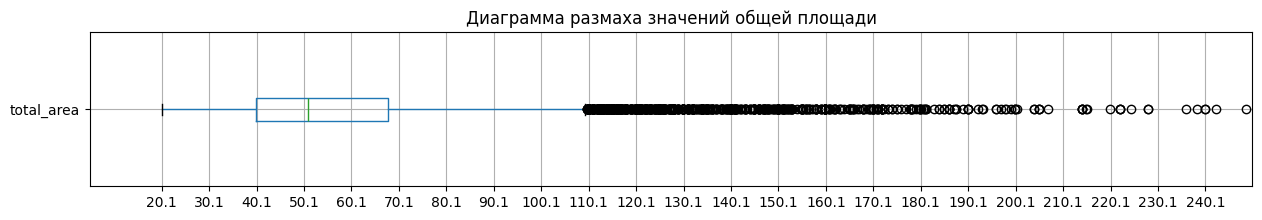

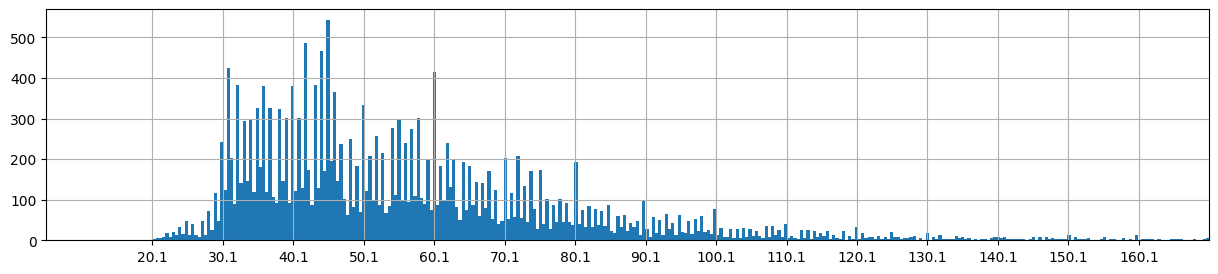

In [54]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (15,2))
plt.xticks(np.arange(min(data['total_area']), max(data['total_area']), 10))
ax = data.total_area.to_frame().boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений общей площади')
ax.set_xlim(5, 250)
plt.show()

# построим гистограмму
plt.xticks(np.arange(min(data['total_area']), max(data['total_area']), 10))
plt.xlim(5, 170)
data.total_area.hist(bins=500, figsize = (15, 3))
plt.show()

После построения графиков ясно, что больше всего объявлений с общей площадью 44 м².

</div>

### Жилая площадь

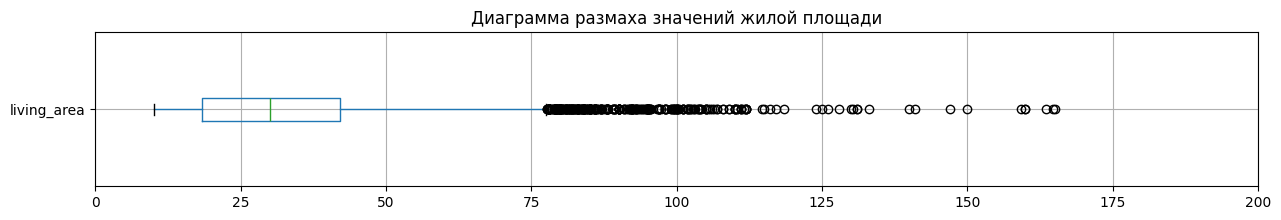

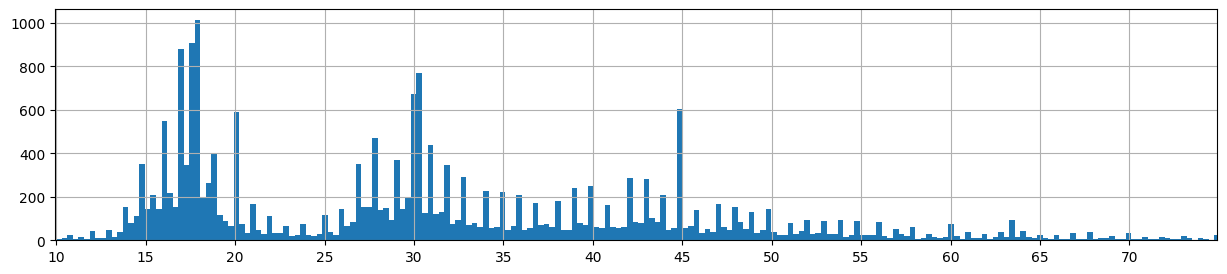

In [56]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (15, 2))
ax = data.living_area.to_frame().boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жилой площади')
ax.set_xlim(0, 200);
plt.show()

# построим гистограмму
plt.xticks(np.arange(min(data['living_area']), max(data['living_area']), 5))
plt.xlim(10, 75)
data.living_area.hist(bins=500, figsize = (15, 3))
plt.show()

После построения графиков ясно, что лидируют объявления с жилой площадью 18 м².

</div>

### Площадь кухни

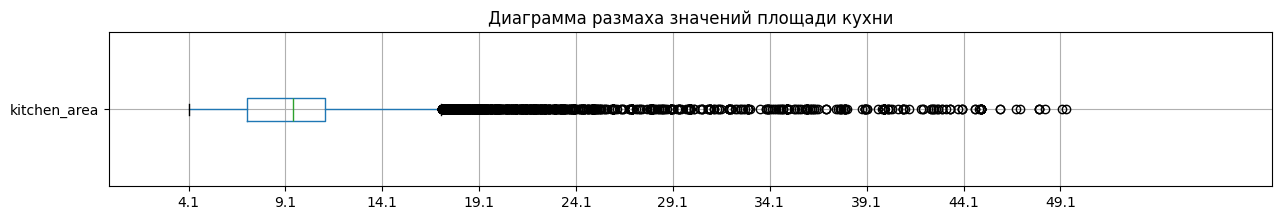

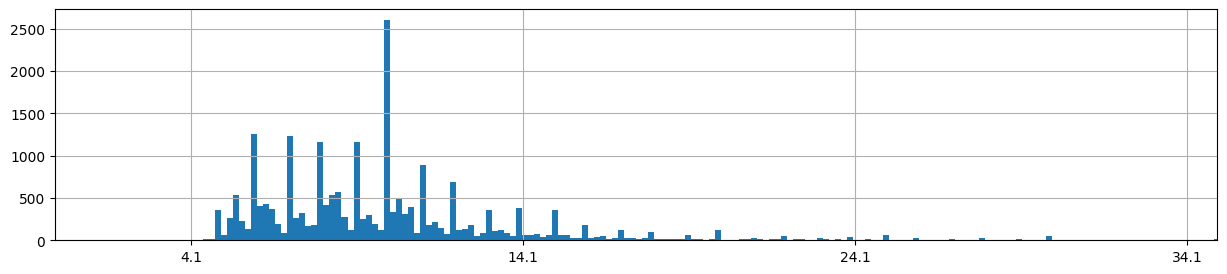

In [57]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (15,2))
plt.xticks(np.arange(min(data['kitchen_area']), max(data['kitchen_area']), 5))
ax = data.kitchen_area.to_frame().boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади кухни')
ax.set_xlim(0, 60);
plt.show()

# построим гистограмму
plt.xticks(np.arange(min(data['kitchen_area']), max(data['kitchen_area']), 10))
plt.xlim(0, 35)
data.kitchen_area.hist(bins=250, figsize = (15, 3))
plt.show()

После построения графиков ясно, что очень много объявлений с площадью кухни в районе 10 м².

</div>

### Цена объекта

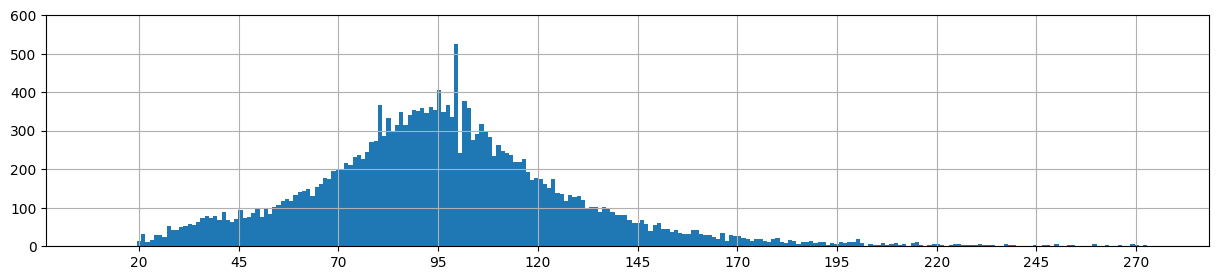

In [58]:
# построим гистограмму
plt.xticks(np.arange(min(data['price_meter'] / 1000), max(data['price_meter'] / 1000), 25))
plt.ylim(0, 600)
((data.price_meter) / 1000).hist(bins=250, range=(10, 275), figsize = (15, 3))
plt.show()

После построения графика ясно, что очень много объявлений с ценой 100 000 за м².

</div>

### Количество комнат

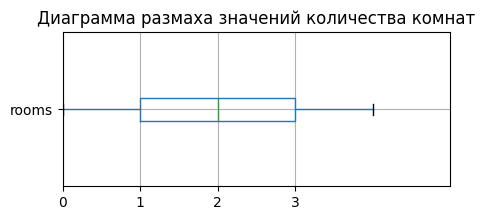

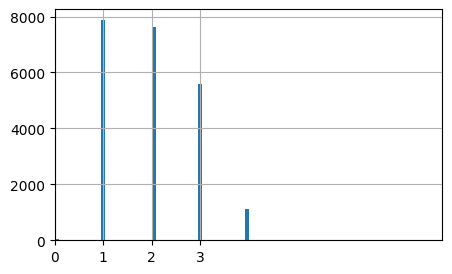

In [59]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (5,2))
plt.xticks(np.arange(min(data['rooms']), max(data['rooms']), 1))
ax = data.rooms.to_frame().boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений количества комнат')
ax.set_xlim(0, 5);
plt.show()

# построим гистограмму
plt.xticks(np.arange(min(data['rooms']), max(data['rooms']), 1))
plt.xlim(0, 8)
data.rooms.hist(bins=50, figsize = (5, 3))
plt.show()

После построения графиков ясно, что очень много объявлений о продаже однокомнатных и двухкомнатных квартир. 

</div>

### Высота потолков

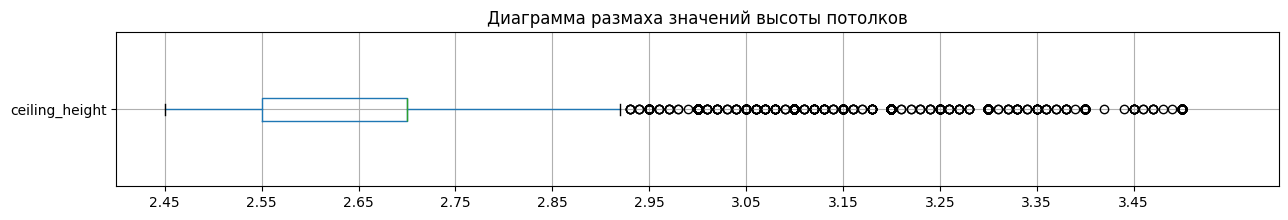

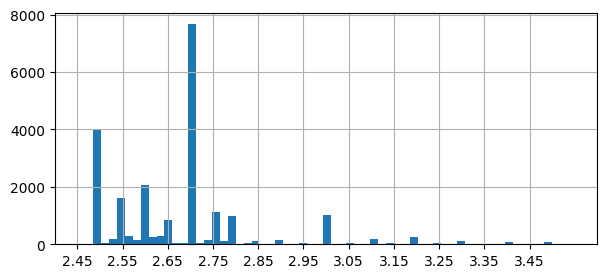

In [60]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (15,2))
plt.xticks(np.arange(min(data['ceiling_height']), max(data['ceiling_height']), 0.1))
ax = data[['ceiling_height']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений высоты потолков')
ax.set_xlim(2.4, 3.6);
plt.show()

# построим гистограмму
plt.xticks(np.arange(min(data['ceiling_height']), max(data['ceiling_height']), 0.1))
plt.xlim(2.4, 3.6)
data['ceiling_height'].hist(bins=60, figsize = (7, 3))
plt.show()

После построения графиков ясно, что очень больше всего объявлений о продаже квартир с высотой потолка 2.7 м.

</div>

### Тип этажа квартиры

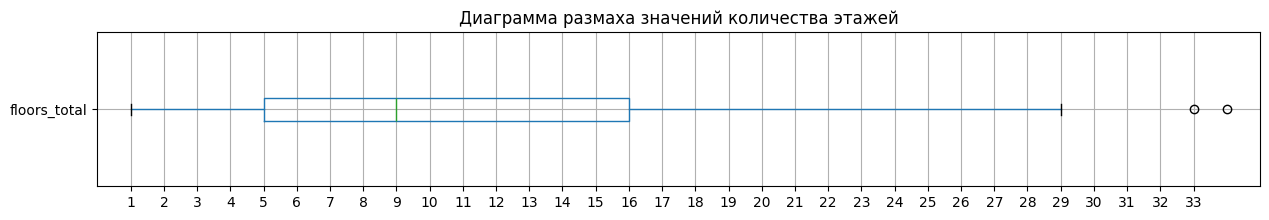

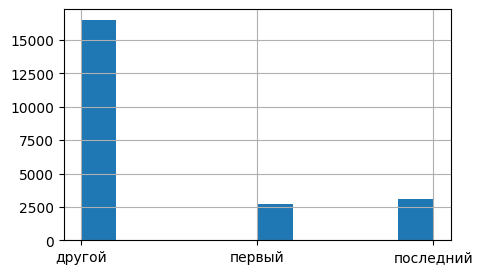

In [61]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (15,2))
plt.xticks(np.arange(min(data['floors_total']), max(data['floors_total']), 1))
ax = data.floors_total.to_frame().boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений количества этажей')
ax.set_xlim(0, 35);
plt.show()

# построим гистограмму
data.type_floor.hist(figsize = (5, 3))
plt.show()

После построения гистограммы ясно, что основная масса объявлений о продаже в категории другие этажи.

</div>

### Общее количество этажей в доме

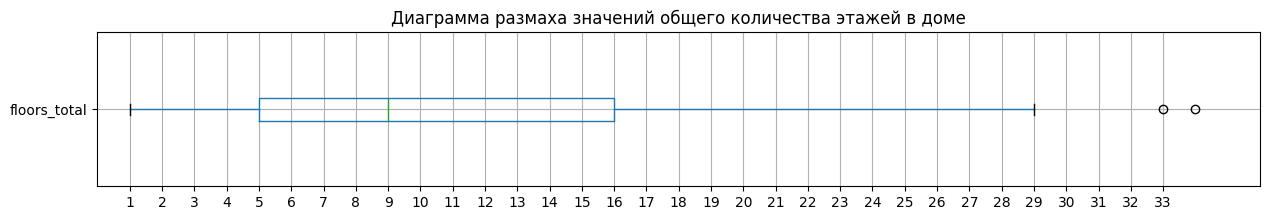

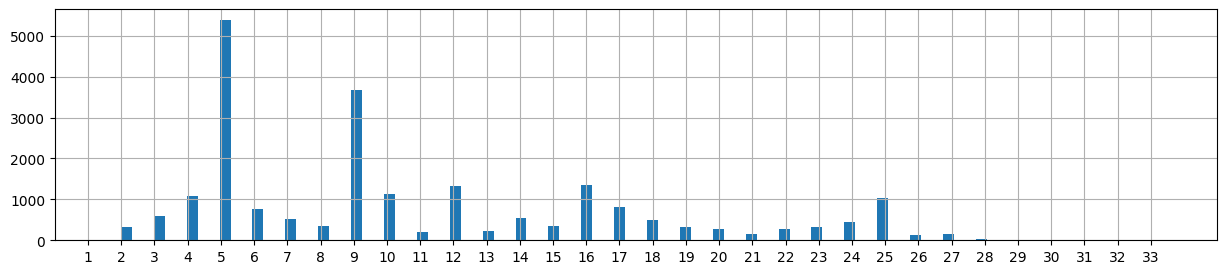

In [62]:
# построим гистограмму# 
fig, ax = plt.subplots(figsize = (15,2))
plt.xticks(np.arange(min(data['floors_total']), max(data['floors_total']), 1))
ax = data.floors_total.to_frame().boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений общего количества этажей в доме')
ax.set_xlim(0, 36);
plt.show()

# построим гистограмму
plt.xticks(np.arange(min(data['floors_total']), max(data['floors_total']), 1))
plt.xlim(0, 35)
data.floors_total.hist(bins=100, figsize = (15, 3))
plt.show()

После построения графиков ясно, что лидируют объявления о продаже квартир в пятиэтажных домах.

</div>

### Расстояние до центра города

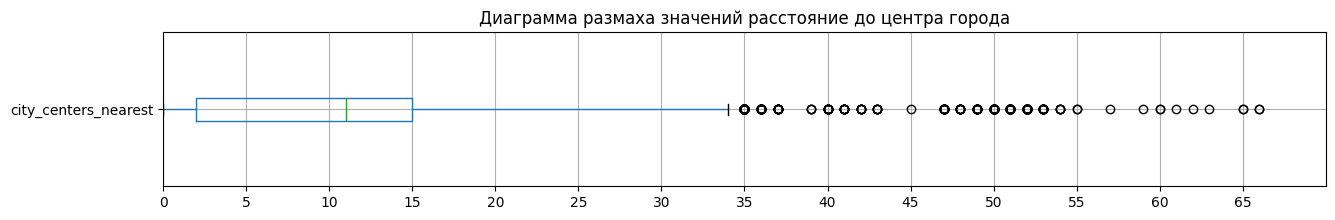

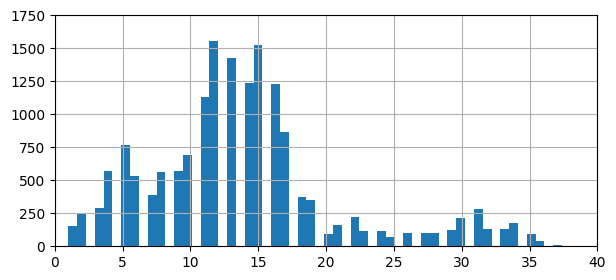

In [63]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (15,2))
plt.xticks(np.arange(min(data['city_centers_nearest']), max(data['city_centers_nearest']), 5))
ax = data[['city_centers_nearest']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений расстояние до центра города')
ax.set_xlim(0, 70);
plt.show()

# построим гистограмму
plt.xticks(np.arange(min(data['city_centers_nearest']), max(data['city_centers_nearest']), 5))
plt.xlim(0, 40)
plt.ylim(0, 1750)
(data[data['city_centers_nearest'] > 0]['city_centers_nearest']).hist(bins=100, figsize = (7, 3))
plt.show()

После построения графиков ясно, что в основном расстояние до центра 11 км.

</div>

### Расстояние до ближайшего парка

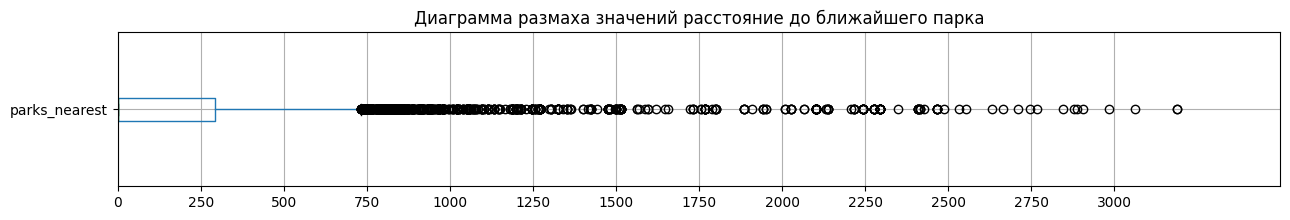

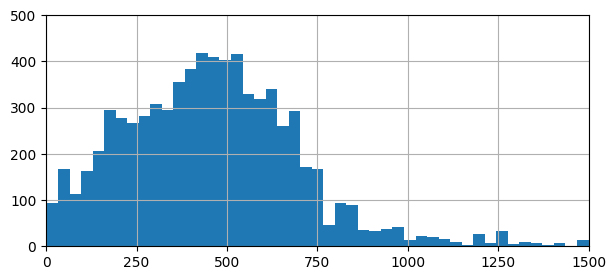

In [64]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (15,2))
plt.xticks(np.arange(min(data['parks_nearest']), max(data['parks_nearest']), 250))
ax = data[['parks_nearest']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений расстояние до ближайшего парка')
ax.set_xlim(0, 3500);
plt.show()
data.parks_nearest.mean()

# построим гистограмму
plt.xticks(np.arange(min(data['parks_nearest']), max(data['parks_nearest']), 250))
plt.xlim(0, 1500)
plt.ylim(0, 500)
(data[data['parks_nearest'] > 0]['parks_nearest']).hist(bins=100, figsize = (7, 3))
plt.show()

После построения диаграммы ясно, что среднее расстояние до парка в районе 473 м.

</div>

### Продолжительность продажи

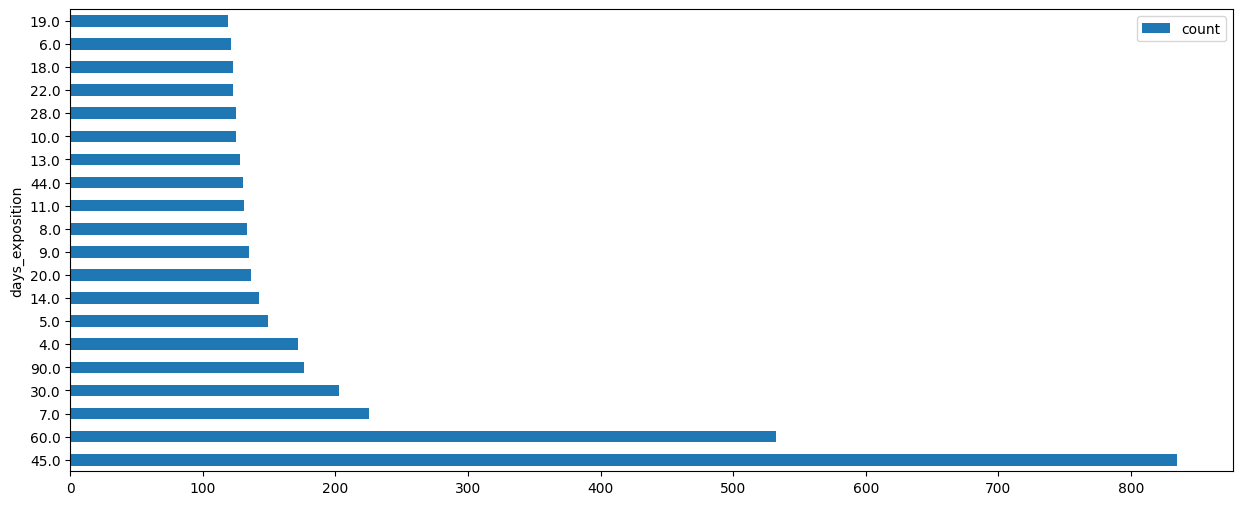

In [65]:
# изучим моды на сырых данных 
data['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

Выделяются моды на 45 и 60 дней, а значения на 44 и 45 дней, явно имеет техническую причину снятия, из-за формата числа. В нашем проекте — моды, из-за подозрения что это техническое снятие с продаж, могут искажать реальный расчет скорости продажи квартиры.

Второе предположение о причине появления подобных значений — результат деятельности роботов агентств недвижимости, которые обновляют свои предложения с определенной частотой.

Полностью из проекта удалять их не стоит, можно временно исключить из расчета скорости продаж

</div>

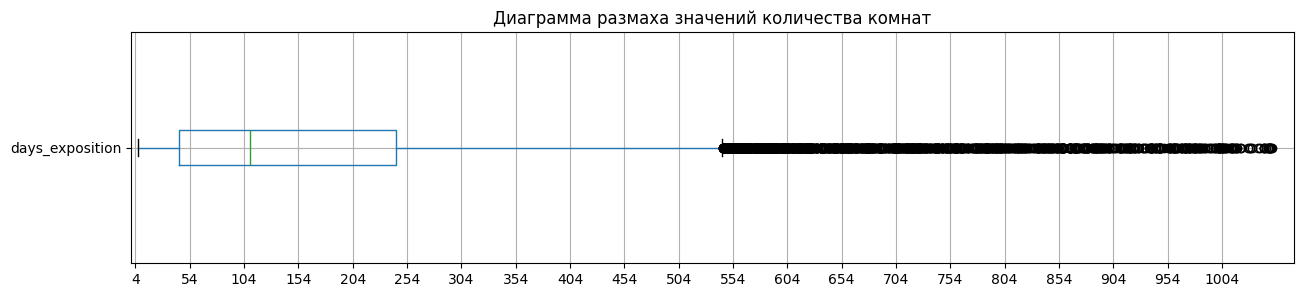

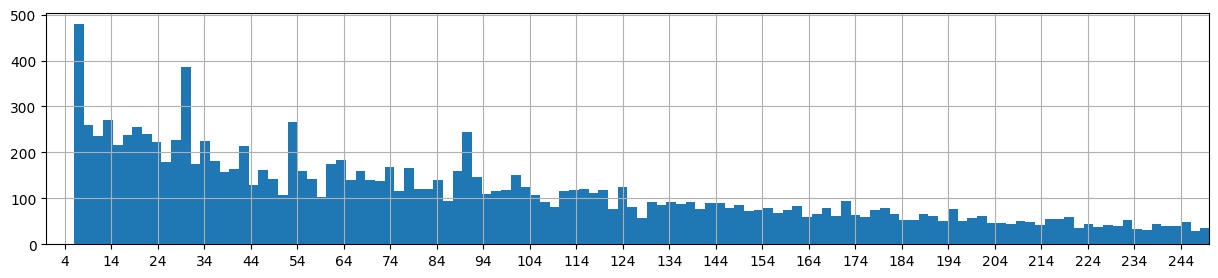

In [66]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (15,3))
plt.xticks(np.arange(min(data['days_exposition'].dropna()), max(data['days_exposition'].dropna()), 50))
ax = (data
      .query('days_exposition > 5 and days_exposition < 1052')
      .query('days_exposition != 45 and days_exposition != 60') # исключаем моды из расчета 
     )['days_exposition'].to_frame().boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений количества комнат')
ax.set_xlim(0, 1070);
plt.show()

# построим гистограмму
plt.xticks(np.arange(min(data['days_exposition'].dropna()), max(data['days_exposition'].dropna()), 10))
plt.xlim(0, 250)
(data.query('days_exposition > 5 and days_exposition < 1052')
 .query('days_exposition != 45 and days_exposition != 60') # исключаем моды из расчета
)['days_exposition'].hist(bins=500, figsize = (15, 3))
plt.show()

После построения графиков ясно, что очень много объявлений с супер быстрой продажей в 5 дней.

</div>

### Лучшие показатели параметров.

После построения графиков выделим следующие моменты по параметрам.

- количество потерь после фильтрации и предобработки пределах нормы, 6%;
- больше всего объявлений с общей площадью 44 м²;
- очень много продается квартир с жилой площадью в около 18 м²;
- лидируют объявлений с площадью кухни в районе 10 м². После 19 м² есть небольшие количество выбросов;
- много объявлений с ценой 100 000 за м²;
- больше всего объявлений о продаже однокомнатных и двухкомнатных квартир. Медиана не стремится к выбросам, их количество не велико;
- лидируют объявлений о продаже квартир с высотой потолка 2.7 м.;
- больше всего объявлений о продаже квартир в пятиэтажках;
- в основном расстояние до центра находится в диапазоне 11 км.;
- в среднем расстояние до близжайшего парка по имеющимся данным в районе 473 м.



In [76]:
# сводная таблица числовых параметров
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'mean', 'median', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,268.00","22,268.00","22,268.00","19,293.00","22,268.00","22,268.00","22,268.00","22,268.00","22,268.00"
min,0.00,20.10,2.45,4.00,"630,000.00",10.08,4.10,1.00,1.00
mean,1.99,57.07,2.68,169.34,"5,875,387.23",32.37,10.17,5.93,10.79
median,2.00,51.00,2.70,94.00,"4,600,000.00",30.00,9.50,4.00,9.00
max,4.00,248.70,3.50,"1,050.00","159,984,000.00",165.00,49.40,32.00,34.00


## Как быстро продавались квартиры

Изучим, как быстро продавались квартиры (столбец *days_exposition*).

- построим гистограмму;
- посчитаем среднее и медиану;
- опишем, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими.

</div>

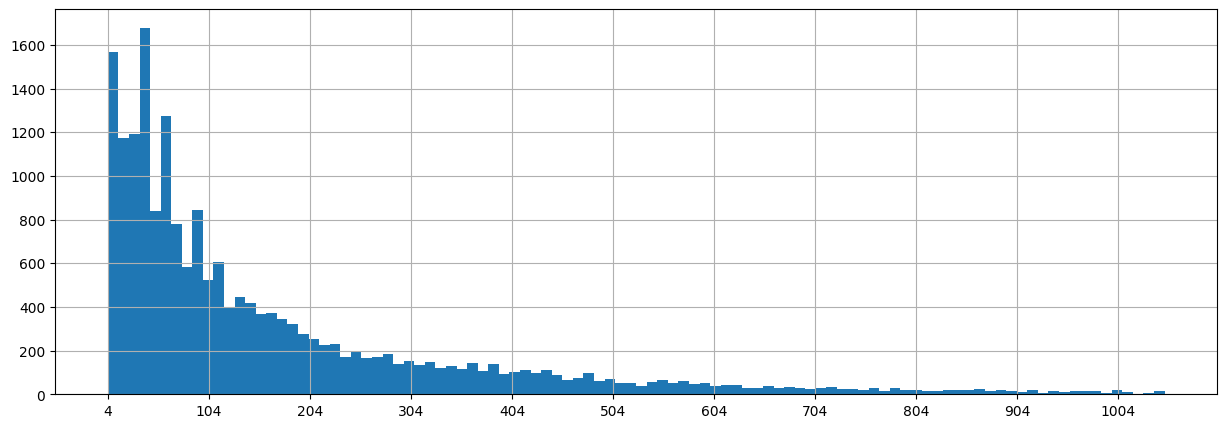

In [84]:
# построим гистограмму
data_drop = data['days_exposition'].dropna()
plt.xticks(np.arange(min(data_drop), max(data_drop), 100))
data_drop.hist(bins=100, figsize=(15, 5))
plt.show()

In [85]:
# посчитаем среднее и медиану
data['days_exposition'].describe()

count    19293.00000
mean       169.33551
std        191.33606
min          4.00000
25%         45.00000
50%         94.00000
75%        222.00000
max       1050.00000
Name: days_exposition, dtype: float64

Опишем, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими. Из вывода метода `describe()` ясно, что стандартное отклонение больше среднего на 39 дней. Все квартиры находящиеся в продаже больше 231 дня считаем долгой продажей. Как и продажа бстрее 45 дней это быстро. Также средний срок продажи 180 дней, а медианное значение 95 дней, почти в два раза меньше. В распределении есть длинный хвост с высокими значениями или несколько очень больших значений. Это влияет на среднее, но не на медиану.

</div>

In [86]:
(data.groupby('year_public', as_index=False)
 .agg(mean_days_exposition = ('days_exposition', 'mean'))
 .set_index('year_public')
)

,mean_days_exposition
year_public,
2014,737.486511
2015,550.517090
2016,318.347382
2017,158.921234
2018,94.552620
2019,31.665354


Вывод: после изучения столбца *days_exposition* выяснили следующее: 

- медианный срок продажи 95 дней,
- средний срок продажи 180 дней,
- самая долгая продажа 1580 дней,
- самая быстрая 1 день,
- в 2019 году квартиры продавались быстрее всего,
- в 2014году квартиры продавались медленнее всего,
- продажа до 45 дней быстрая,
- продажа после 231 дня медленная.

</div>

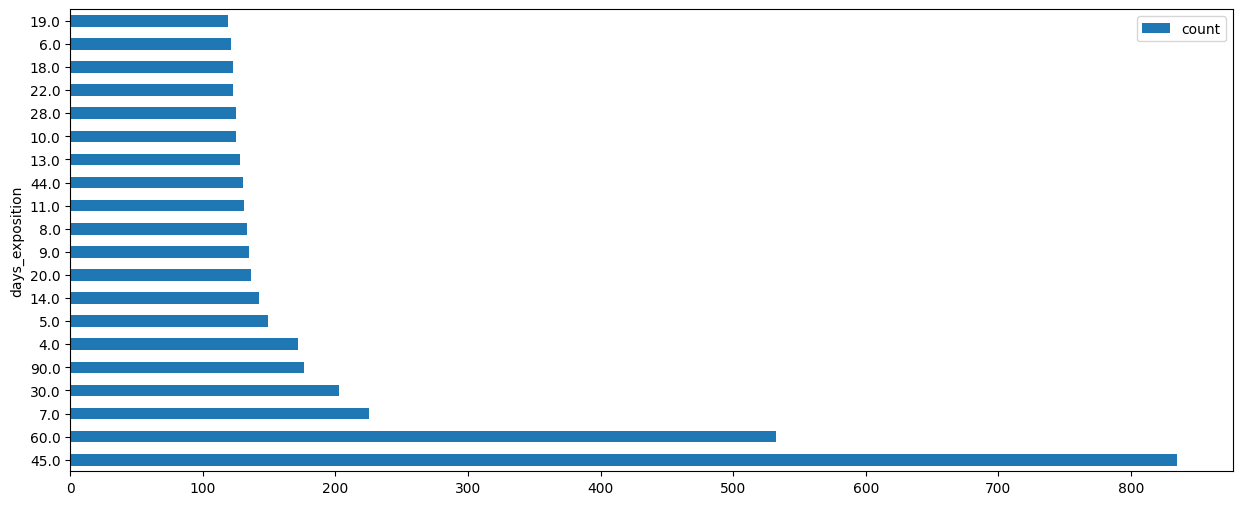

In [133]:
# моды на сырых данных
(
    data['days_exposition']
    .value_counts()
    .to_frame()
    .head(20)
    .plot(kind = 'barh', figsize = (15,6), rot = 0)
)

## Факторы, влияющие на стоимость.

Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта. Построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией используем сводные таблицы.

</div>

### Общая площадь

In [88]:
# функция создания сбалансированных категорий
pd.qcut(data['total_area'], 4)

0         (67.8, 248.7]
1          (40.0, 51.0]
2          (51.0, 67.8]
3         (67.8, 248.7]
4         (67.8, 248.7]
              ...      
23694     (67.8, 248.7]
23695      (51.0, 67.8]
23696      (51.0, 67.8]
23697     (67.8, 248.7]
23698    (20.099, 40.0]
Name: total_area, Length: 22268, dtype: category
Categories (4, interval[float64, right]): [(20.099, 40.0] < (40.0, 51.0] < (51.0, 67.8] < (67.8, 248.7]]

На основании диапазонов, указанных выше, создадим столбец в датафрейме *total_area_category* с категориями:

- до 40 м²;
- от 40 до 52 м² ;
- от 52 до 69.7 м² ;
- от 69.7 м².

Используем собственную функцию с именем `categorize_total_area()` и применим метод `apply()` для создания стобца с категорями.

</div>

In [89]:
# функция категоризации
def categorize_total_area(row):
    if 0 < row <= 40:
        return 'до 40'
    elif 40 <= row <= 52:
        return 'от 40 до 52'
    elif 52 <= row <= 69.7:
        return 'от 52 до 69.7'
    elif row > 69.7:
        return 'от 69.7'

In [90]:
# создадим столбец
data['total_area_category'] = data['total_area'].apply(categorize_total_area)

# сводная таблица
group_total_area = data.groupby(
    'total_area_category', as_index=False).agg(count = ('total_area_category', 'count'), 
                                                median_price = ('last_price', 'median')).set_index('total_area_category')
group_total_area

,count,median_price
total_area_category,,
до 40,5765,3330000.0
от 40 до 52,5732,4100000.0
от 52 до 69.7,5601,5300000.0
от 69.7,5170,8700000.0


После группировки ясно, что с увеличение общей площади цена квартиры растет.

</div>

### Жилая площадь

In [91]:
# функция создания сбалансированных категорий
pd.qcut(data['living_area'], 4)

0         (42.0, 165.0]
1          (18.3, 30.0]
2          (30.0, 42.0]
3         (42.0, 165.0]
4          (30.0, 42.0]
              ...      
23694     (42.0, 165.0]
23695      (30.0, 42.0]
23696      (18.3, 30.0]
23697      (30.0, 42.0]
23698    (10.079, 18.3]
Name: living_area, Length: 22268, dtype: category
Categories (4, interval[float64, right]): [(10.079, 18.3] < (18.3, 30.0] < (30.0, 42.0] < (42.0, 165.0]]

На основании диапазонов, указанных выше, создадим столбец в датафрейме *living_area_category* с категориями:

- до 18.4 м²;
- от 18.4 до 30.3 м²;
- от 30.3 до 42.7 м²;
- от 42.7 м².

Используем собственную функцию с именем `categorize_living_area()` и применим метод `apply()` для создания стобца с категорями.

</div>

In [92]:
# функция категоризации
def categorize_living_area(row):
    if 0 < row <= 18.4:
        return 'до 18.4'
    elif 18.4 <= row <= 30.3:
        return 'от 18.4 до 30.3'
    elif 30.3 <= row <= 42.7:
        return 'от 30.3 до 42.7'
    elif row > 42.7:
        return 'от 42.7'

In [93]:
# создадим столбец в датафрейме
data['living_area_category'] = data['living_area'].apply(categorize_living_area)

# сводная таблица
group_living_area = data.groupby(
    'living_area_category', as_index=False).agg(count = ('living_area_category', 'count'), 
                                                median_price = ('last_price', 'median')).set_index('living_area_category')
group_living_area

,count,median_price
living_area_category,,
до 18.4,5675,3400000.0
от 18.4 до 30.3,5720,4100000.0
от 30.3 до 42.7,5673,5300000.0
от 42.7,5200,7700000.0


После группировки ясно, что с увеличение жилой площади цена квартиры растет.

</div>

### Площад кухни

In [94]:
# функция создания сбалансированных категорий
pd.qcut(data['kitchen_area'], 4)

0        (11.12, 49.4]
1         (9.5, 11.12]
2           (7.1, 9.5]
3         (9.5, 11.12]
4        (11.12, 49.4]
             ...      
23694    (11.12, 49.4]
23695       (7.1, 9.5]
23696       (7.1, 9.5]
23697    (11.12, 49.4]
23698       (7.1, 9.5]
Name: kitchen_area, Length: 22268, dtype: category
Categories (4, interval[float64, right]): [(4.098999999999999, 7.1] < (7.1, 9.5] < (9.5, 11.12] < (11.12, 49.4]]

На основании диапазонов, указанных выше, создадим столбец в датафрейме *kitchen_area_category* с 
категориями:

- от 0 до 7.2 м²;
- от 7.2 до 9 м²;
- от 9 до 11.5 м²;
- от 11.5 до 112 м²;
- от 112 м².

Используем собственную функцию с именем `categorize_kitchen_area()` и применим метод `apply()` для создания стобца с категорями.

</div>

In [95]:
# функция категоризации
def categorize_kitchen_area(row):
    if row <= 7.2:
        return 'от 0 до 7.2'
    elif 7.2 <= row <= 9:
        return 'от 7.2 до 9'
    elif 9 <= row <= 11.5:
        return 'от 9 до 11.5'
    elif 11.5 <= row <= 112:
        return 'от 11.5 до 112'
    elif row > 112:
        return 'от 112'

In [96]:
# создадим столбец
data['kitchen_area_category'] = data['kitchen_area'].apply(categorize_kitchen_area)

# сводная таблица
group_kitchen_area = data.groupby(
    'kitchen_area_category', as_index=False).agg(count = ('kitchen_area_category', 'count'), 
                                                median_price = ('last_price', 'median')).set_index('kitchen_area_category')
group_kitchen_area.sort_values('median_price')

,count,median_price
kitchen_area_category,,
от 0 до 7.2,5748,3600000.0
от 7.2 до 9,4906,4150000.0
от 9 до 11.5,6442,4800000.0
от 11.5 до 112,5172,7500000.0


После группировки ясно, что с увеличение площади кухни цена квартиры растет.

</div>

### Количество комнат

In [97]:
# сводная таблица
group_rooms = data.groupby(
    'rooms', as_index=False).agg(count = ('rooms', 'count'), 
                                                median_price = ('last_price', 'median')).set_index('rooms')

# сортируем значения больше 4% от всех объявлений
group_rooms.query('count > 1171').sort_values('count')

,count,median_price
rooms,,
3,5597,6200000.0
2,7633,4799000.0
1,7867,3600000.0


После группировки ясно, что с увеличение количества комнат цена квартиры растет.

</div>

### Этаж

In [98]:
# сводная таблица
group_floors = data.groupby(
    'type_floor', as_index=False).agg(count = ('type_floor', 'count'), 
                                                median_price = ('last_price', 'median')).set_index('type_floor')

group_floors.sort_values('median_price')

,count,median_price
type_floor,,
первый,2715,3900000.0
последний,3069,4250000.0
другой,16484,4800000.0


После группировки ясно, что влияние этажа квартиры на стоимость неоднозначно. Самая крупная группа с квартирами которые находятся не на первом и не на последнем этаже продаются по более дорогой цене.

</div>

### Дата размещения

Выясним, как распределялась цена в зависимости от даты размещения (день недели, месяц, год).

</div>

In [99]:
# сводная таблица дня недели
group_day_week = (
    data
    .groupby('day_week_public', as_index=False)
    .agg(count = ('day_week_public', 'count'),
         median_price = ('last_price', 'median'))
    .set_index('day_week_public')
)

group_day_week.sort_values('median_price')

,count,median_price
day_week_public,,
4,3777,4500000.0
6,1573,4500000.0
5,1812,4550000.0
3,4025,4590000.0
0,3392,4600000.0
2,3737,4650000.0
1,3952,4700000.0


После группировки ясно следующее. Пик стоимости во вторник и понедельник, ближе к выходны цена ниже

</div>

In [100]:
# сводная таблица по месяцам
group_mount = (
    data
    .groupby('mount_public', as_index=False)
    .agg(count = ('mount_public', 'count'),
         median_price = ('last_price', 'median'))
    .set_index('mount_public')
)

group_mount.sort_values('median_price')

,count,median_price
mount_public,,
6,1658,4400000.0
5,1193,4500000.0
10,1996,4530000.0
1,1402,4545000.0
8,1655,4550000.0
3,2420,4592000.0
2,2487,4600000.0
7,1587,4600000.0
9,1862,4650000.0


После группировки ясно следующее. Медианная цена продажи в феврале, марте и июле одинаковая. Минимальная цена в июне, максимальная в апреле.

</div>

In [101]:
# сводная таблица по годам
group_year = (
    data.groupby('year_public', as_index=False)
    .agg(count = ('year_public', 'count'),
         median_price = ('last_price', 'median'))
    .set_index('year_public')
)

group_year.sort_values('median_price')

,count,median_price
year_public,,
2017,7785,4490000.0
2016,2622,4500000.0
2018,8105,4550000.0
2015,939,5000000.0
2019,2725,5000000.0
2014,92,7282500.0


После группировки ясно следующее. Медианная цена продажи в 2016, 2017, 2018 годах практически одинаковая, с разницей лишь в 50 000р. 2014 год не учитываем из-за маленького количества объявлений. Максимальная цена в 2015 году, минимальная в 2017.

</div>

### Графики зависимости параметров

Построим графики, которые покажут зависимость цены от указанных выше параметров.
</div>

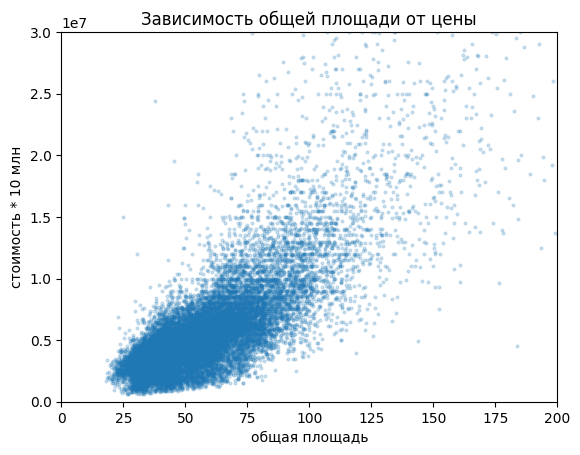

In [135]:
# общая площадь
abcis_area = data['total_area']
ordinat_price = data['last_price']

# диаграмма рассеяния
noise = np.random.normal(0, 2, size=len(data))
abcis_area_jitter = abcis_area + noise
ordinat_price_jitter = ordinat_price + noise
plt.plot(abcis_area_jitter, ordinat_price_jitter, 'o', alpha=0.2, markersize=2)
plt.xlim(0, 200)
plt.ylim(0, 30000000)
plt.xlabel('общая площадь')
plt.ylabel('стоимость * 10 млн')
plt.title('Зависимость общей площади от цены')
plt.show()

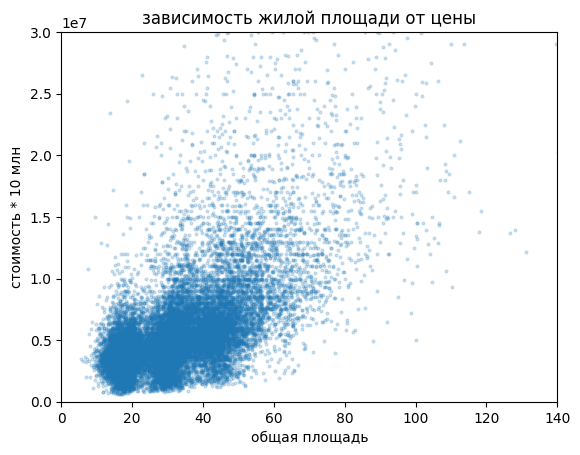

In [136]:
# жилая площадь
abcis_living_area = data['living_area']

# диаграмма рассеяния
noise = np.random.normal(0, 2, size=len(data))
abcis_living_area_jitter = abcis_living_area + noise
ordinat_price_jitter = ordinat_price + noise
plt.plot(abcis_living_area_jitter, ordinat_price_jitter, 'o', alpha=0.2, markersize=2)
plt.xlim(0, 140)
plt.ylim(0, 30000000)
plt.xlabel('общая площадь')
plt.ylabel('стоимость * 10 млн')
plt.title('зависимость жилой площади от цены')
plt.show()

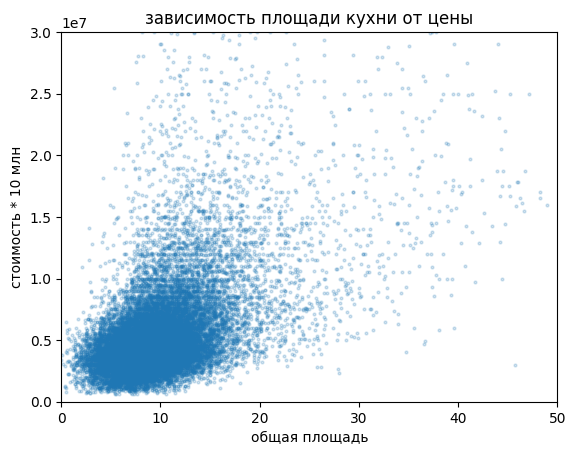

In [137]:
# площадь кухни
abcis_kitchen_area = data['kitchen_area']

# диаграмма рассеяния
noise = np.random.normal(0, 2, size=len(data))
abcis_kitchen_area_jitter = abcis_kitchen_area + noise
ordinat_price_jitter = ordinat_price + noise
plt.plot(abcis_kitchen_area_jitter, ordinat_price_jitter, 'o', alpha=0.2, markersize=2)
plt.xlim(0, 50)
plt.ylim(0, 30000000)
plt.xlabel('общая площадь')
plt.ylabel('стоимость * 10 млн')
plt.title('зависимость площади кухни от цены')
plt.show()

Рассчитаем коэффициент корреляции для поиска линейных зависимостей

</div>

In [105]:
columns = ['total_area', 'living_area', 'kitchen_area']
subset = data[columns]
subset.corr()

,total_area,living_area,kitchen_area
total_area,1.000000,0.899056,0.541185
living_area,0.899056,1.000000,0.305543
kitchen_area,0.541185,0.305543,1.000000


По корреляционной матрице ясно следующее:

- по всем параметрам показатель положительный;
- чем больше общая площадь, тем больше жилая площадь;
- связь между общей площадю и площадью кухни слабая;
- связь между жилой площадью и площадью кухни слабая.

</div>

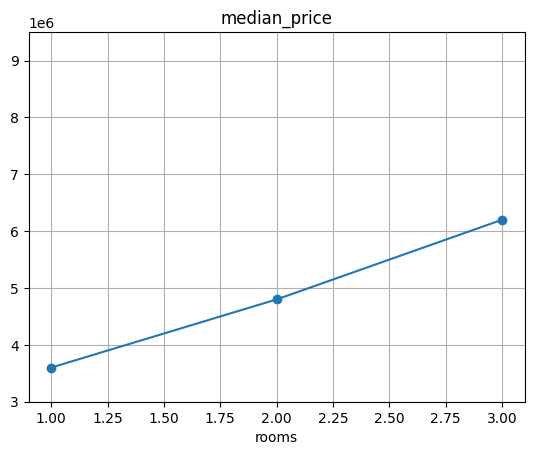

In [106]:
# количество комнат
(
    group_rooms
    .query('count > 1171')['median_price']
    .plot(ylim=(3000000, 9500000), 
          style='o-', 
          title='median_price', 
          grid=True)
)
plt.show()

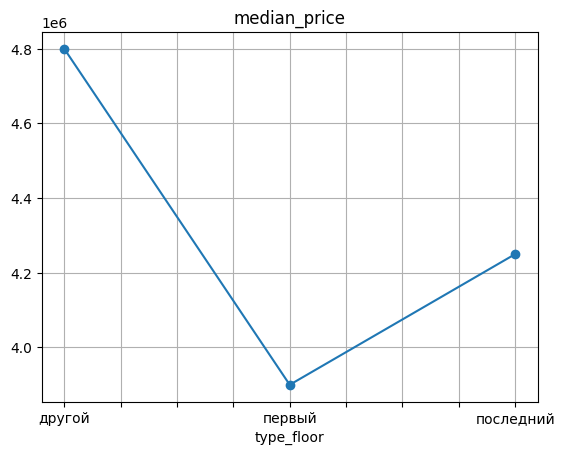

In [107]:
# этаж
group_floors['median_price'].plot(
    style='o-', title='median_price', grid=True)
plt.show()

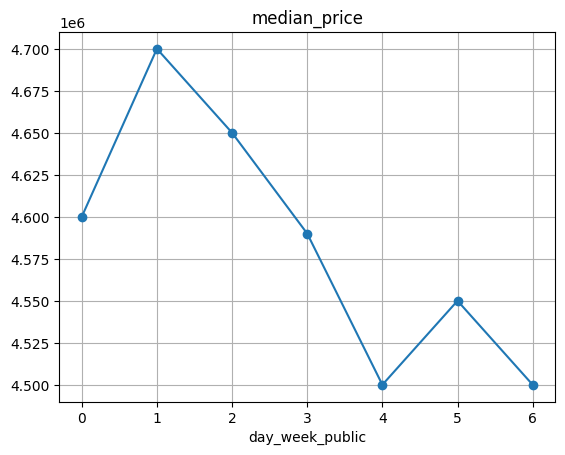

In [108]:
# день размещения
group_day_week['median_price'].plot(
    style='o-', title='median_price', grid=True)
plt.show()

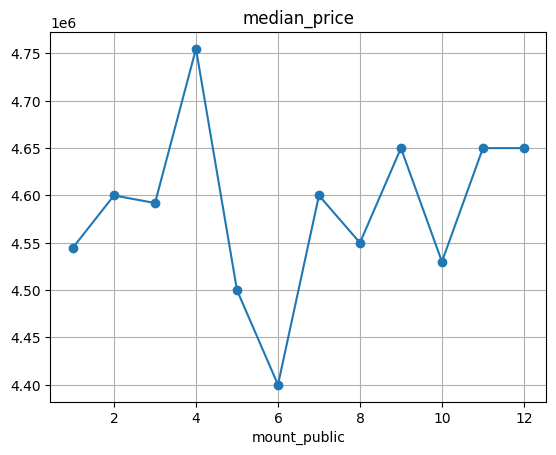

In [109]:
# месяц размещения
group_mount['median_price'].plot(
    style='o-', title='median_price', grid=True)
plt.show()

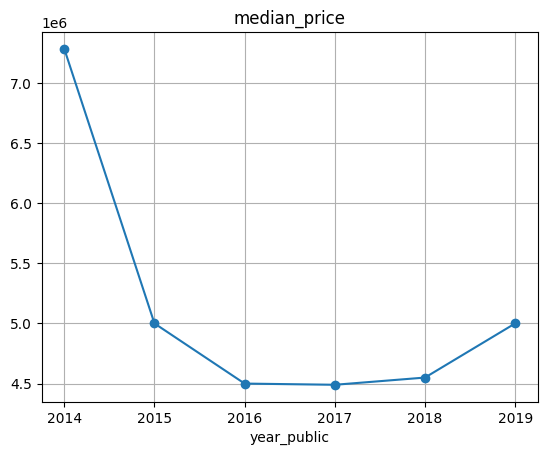

In [110]:
# год размещения
group_year['median_price'].plot(
    style='o-', title='median_price', grid=True)
plt.show()

### Взаимосвязь с другими параметрами

Необходимо учесть другие факторы, которые также изменяются с годами: площадь и кол-во объявлений о продаже (стоит добавить или графики, или сводные таблицы и исследовать взаимное влияние параметров: кол-во записей и изменение средней цены и средней площади в течение лет)

</div>

In [111]:
# год продажи и общая площадь
(data.groupby('year_public', as_index=False)
 .agg(mean_total_area = ('total_area', 'mean'),
     count_advertisement = ('last_price', 'count'),
     mean_last_price = ('last_price', 'mean')
     ).round()
 .set_index('year_public')
)

,mean_total_area,count_advertisement,mean_last_price
year_public,,,
2014,82.0,92,10912257.0
2015,64.0,939,7007263.0
2016,59.0,2622,6072750.0
2017,57.0,7785,5802507.0
2018,56.0,8105,5591444.0
2019,56.0,2725,6178148.0


**Вывод:** после определения факторов, выяснили как они влияют на цену:

- по всем параметрам показатель положительный;
- чем больше общая площадь, тем больше жилая площадь;
- связь между общей площадю и площадью кухни слабая;
- связь между жилой площадью и площадью кухни слабая;
- влияние этажа квартиры на стоимость неоднозначно. Самая крупная группа с квартирами которые находятся не на первом и не на последнем этаже продаются по более дорогой цене;
- пик стоимости во вторник и понедельник, ближе к выходны цена ниже;
- медианная цена продажи в феврале, марте и июле одинаковая. Минимальная цена в июне, максимальная в апреле;
- едианная цена продажи в 2016, 2017, 2018 годах практически одинаковая, с разницей лишь в 50 000р. 2014 год не учитываем из-за маленького количества объявлений. Максимальная цена в 2015 году, минимальная в 2017.

В шаге 8.2.3 изучили столбец *days_exposition* и выяснили следующее: 

- медианный срок продажи 95 дней,
- средний срок продажи 180 дней,
- самая долгая продажа 1580 дней,
- самая быстрая 1 день,
- в 2019 году квартиры продавались быстрее всего,
- в 2014 году квартиры продавались медленнее всего,
- продажа до 45 дней быстрая,
- продажа после 231 дня медленная.

По сводной таблице шага 8.3.7 видно следующее:

- самый высокий показатель общей площади в 2015 году,
- пик количества объявлений в 2016 и 2017 годах,
- пик средней цены в 2015 году.

Количество потерь после фильтрации и предобработки пределах нормы, 6%

</div>

### Средняя цена одного квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

</div>

In [112]:
# сводная таблица
table_top = (
    (data
     .groupby('locality_name', as_index=False)
     .agg(count = ('locality_name', 'count'), 
          mean_price_meter = ('price_meter', 'mean'))
     .set_index('locality_name')
     .astype('int32')
    ).sort_values('count').tail(10)
).sort_values('mean_price_meter')
table_top

,count,mean_price_meter
locality_name,,
Выборг,231,58428
Всеволожск,395,68702
Гатчина,300,69343
Колпино,329,75440
поселок Шушары,429,78524
поселок Мурино,568,85848
поселок Парголово,321,90191
деревня Кудрово,459,95270
Пушкин,351,102971


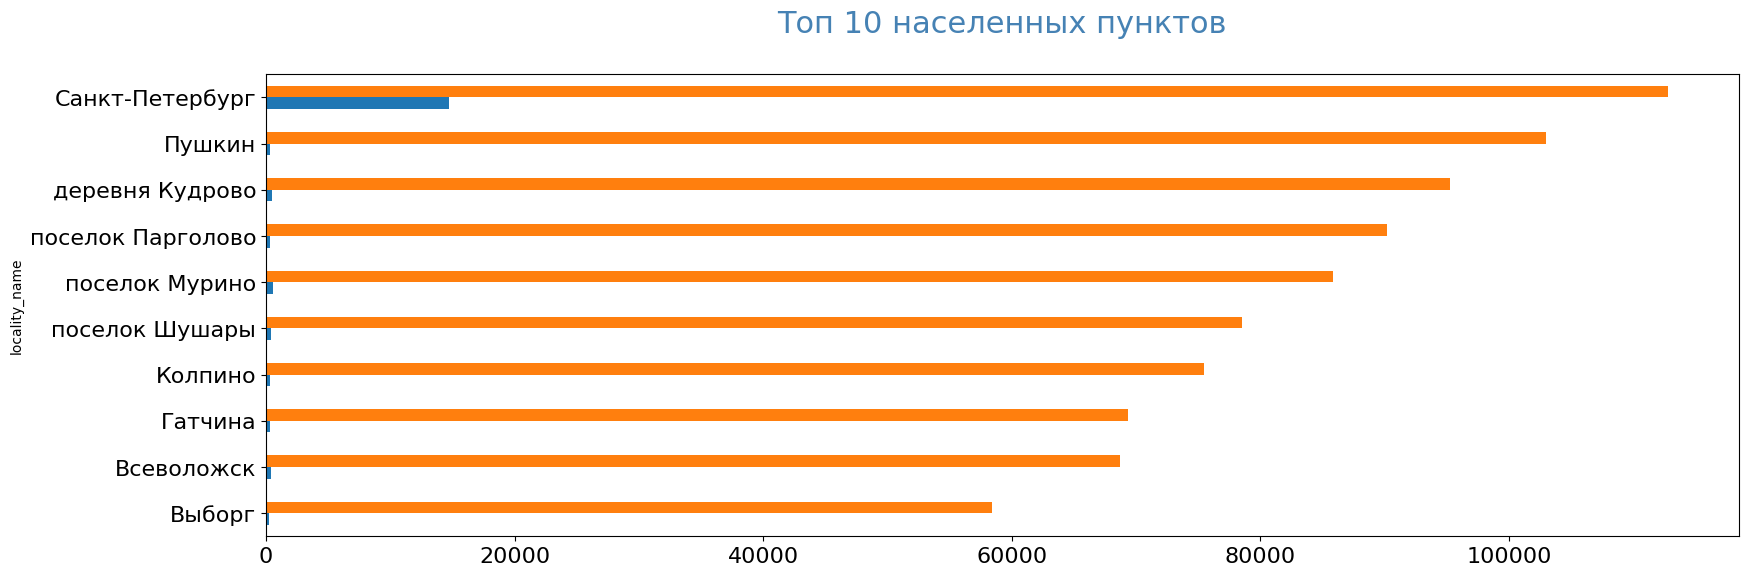

In [113]:
(table_top.plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
 .set_title('Топ 10 населенных пунктов' + "\n", fontsize = 22, color = 'SteelBlue')    
)
plt.show()

Средняя цена топ 10 населенных пунктов находится в диапазоне от 58 141р. до 114 868р. Самая высокая стоимость за квадратный метр данной выборки в Санкт-Петербурге, самая низкая в городе Выборг.

</div>

### Средняя стоимость на удалении от центра.

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца *locality_name* и вычислим их среднюю стоимость на разном удалении от центра. Учитем каждый километр расстояния: узнаем среднюю цену квартир в одном километре от центра, в двух и так далее. Опишем, как стоимость объектов зависит от расстояния до центра города — построим график изменения средней цены для каждого километра от центра Петербурга.

</div>

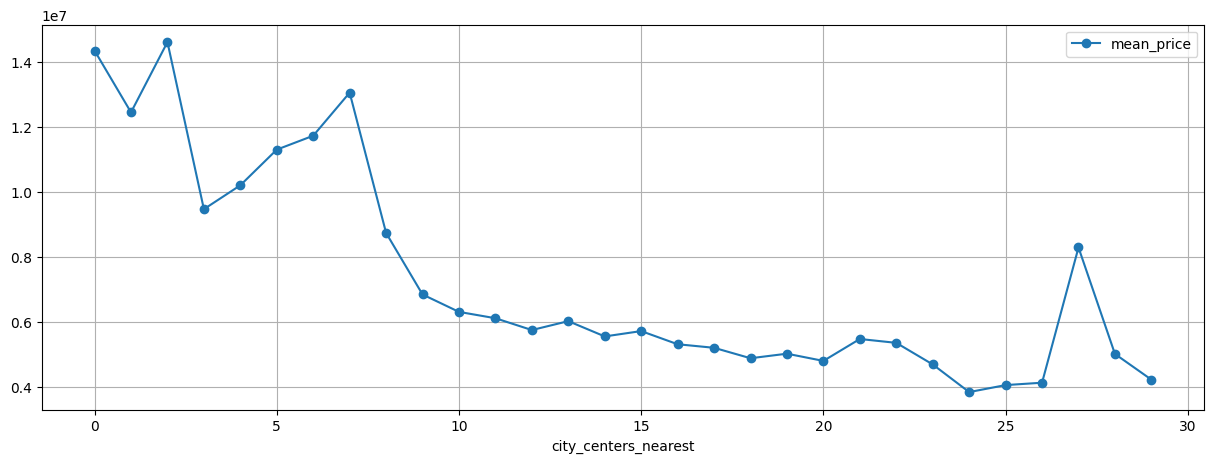

In [114]:
# отсортируем датафрейм по локации Санкт-Петербург
nearest_center_sp = data.query(
    'locality_name == "Санкт-Петербург"').groupby(
    'city_centers_nearest', as_index=False).agg(
    mean_price = ('last_price', 'mean')
).set_index('city_centers_nearest')
nearest_center_sp.plot(style='o-', grid=True, figsize=(15, 5))
plt.show()

По графику видна четкая закономерность. Чем дальше от центра, тем дешевле стоимость квартир. Изучим записи, которые привели к выбросу на 27-м км.

</div>

In [115]:
data.query('city_centers_nearest == 27 and locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,day_week_public,mount_public,year_public,type_floor,total_area_category,living_area_category,kitchen_area_category
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27.0,1.0,1496.0,0.0,0.0,128.0,193918.921875,1,11,2017,другой,от 69.7,от 18.4 до 30.3,от 11.5 до 112
5961,6,2250000,32.0,2018-02-27,1,2.70,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27.0,0.0,0.0,0.0,0.0,178.0,70312.500000,1,2,2018,последний,до 40,до 18.4,от 0 до 7.2


Скачек цены вызван высокой стоимостью квартиры. Еще стоит посмотреть на количество квартир разных категорий (первый, последний, другой), которые продаются с третьего по шестой км и какую долю они занимают на каждом километре, чтобы объяснить пик и провал в центре.

</div>

In [140]:
# city_centers_nearest
pick = data.query('city_centers_nearest >= 3 and city_centers_nearest <= 7')
len_pick = len(pick)
pick_type_flor = (pick
        .groupby('city_centers_nearest', as_index=False)
        .agg(count_advertisement=('type_floor', 'count'),
            shape_advertisement=('type_floor', 'count'),
            mean_price=('last_price', 'mean'))
        .set_index('city_centers_nearest')
        .round()
)
pick_type_flor.shape_advertisement /= len_pick
display(pick_type_flor)


,count_advertisement,shape_advertisement,mean_price
city_centers_nearest,,,
3.0,290,0.113193,9478096.0
4.0,573,0.223653,10212192.0
5.0,771,0.300937,11308624.0
6.0,536,0.209212,11735813.0
7.0,392,0.153005,13060732.0


In [142]:
# type_floor
pick_nearest = (pick
        .groupby('type_floor', as_index=False)
        .agg(count_advertisement=('type_floor', 'count'),
            shape_advertisement=('type_floor', 'count'),
            mean_price=('last_price', 'mean'))
        .set_index('type_floor')
        .round()
               )
pick_nearest.shape_advertisement /= len_pick
display(pick_nearest)

,count_advertisement,shape_advertisement,mean_price
type_floor,,,
другой,1880,0.733802,11830801.0
первый,272,0.106167,7501491.0
последний,410,0.160031,10846522.0


Пик цены квартиры с третьего по седьмой км обусловлен ростом средней цены. Так же объявления, входящие с группу этажей "другие" имеют большее количество и долю, по сравнению с группами "первый" и "последний". 

</div>

## Вывод

В данном проекте мы выполнили предобработку данных, исправили различные проблемы, обработали пропуски и дупликаты, изменили тип данных в нужный формат, разобралисть с аномальными значениями. Так же добавили новые колонки со следующими параметрами, которые помогут в дольнейшем:

- цена одного квадратного метра,
- день недели публикации объявления,
- месяц публикации объявления,
- год публикации объявления,
- тип этажа квартиры,
- расстояние до центра города в километрах.

Мы провели исследовательский анализ данных, который помог установить параметры, влияющие на цену объектов. Установили следующие моменты по параметрам:

- больше всего объявлений с общей площадью 44 м²;
- очень много продается квартир с жилой площадью в около 18 м²;
- лидируют объявлений с площадью кухни в районе 10 м². После 19 м² есть небольшие количество выбросов;
- много объявлений с ценой 100 000 за м²;
- больше всего объявлений о продаже однокомнатных и двухкомнатных квартир. Медиана не стремится к выбросам, их количество не велико;
- лидируют объявлений о продаже квартир с высотой потолка 2.7 м.;
- больше всего объявлений о продаже квартир на этажах со второго по сорок первый;
- лидируют объявления о продаже квартир в пятиэтажных домах;
- в основном расстояние до центра находится в диапазоне 11 км.;
- в среднем расстояние до близжайшего парка в районе 473 м.

В шаге 8.2.3 изучили столбец *days_exposition* и выяснили следующее: 

- медианный срок продажи 95 дней,
- средний срок продажи 180 дней,
- самая долгая продажа 1580 дней,
- самая быстрая 1 день,
- в 2019 году квартиры продавались быстрее всего,
- в 2014 году квартиры продавались медленнее всего,
- продажа до 45 дней быстрая,
- продажа после 231 дня медленная.

Еще мы пределили факторы, которые больше всего влияют на общую (полную) стоимость объекта. Выяснили, что цена прямо зависит от следующих факторов:

- с увеличением общей площади цена квартиры растет;
- с увеличением жилой площади цена квартиры растет;
- с увеличением площади кухни цена квартиры растет;
- с увеличением количества комнат цена квартиры растет;
- влияние этажа квартиры на стоимость неоднозначно. Самая крупная группа с квартирами которые находятся не на первом и не на последнем этаже продаются по более дорогой цене;
- пик стоимости во вторник и понедельник, ближе к выходны цена ниже;
- медианная цена продажи в феврале, марте и июле одинаковая. Минимальная цена в июне, максимальная в апреле;
- едианная цена продажи в 2016, 2017, 2018 годах практически одинаковая, с разницей лишь в 50 000р. 2014 год не учитываем из-за маленького количества объявлений. Максимальная цена в 2015 году, минимальная в 2017.

Отметим слияние населенных пунктов, которые выражаются в виде неявных дупликатов, например:

- городской поселок, поселок городского типа, поселок при железнодорожной станции, коттеджный поселок, поселок станции - заменили на поселок;
- Кудрово заменили на деревня Кудрово.

Также осчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, она находится в диапазоне от 58 141р. до 114 868р. Самая высокая стоимость за квадратный метр данной выборки в Санкт-Петербурге, самая низкая в городе Выборг.

Описали, как стоимость объектов зависит от расстояния до центра города — чем ближе к центру, тем дороже стоимость квартир.

По итогу стоимость квартиры определяет ряд факторов, в основном это удаленность от центра города, площадь, этаж, количество комнат.

Так же по по корреляционной матрице определили следующее:

- по всем параметрам показатель положительный;
- чем больше общая площадь, тем больше жилая площадь;
- связь между общей площадю и площадью кухни слабая;
- связь между жилой площадью и площадью кухни слабая.

По сводной таблице шага 8.3.7 видно следующее:

- самый высокий показатель общей площади в 2015 году,
- пик количества объявлений в 2016 и 2017 годах,
- пик средней цены в 2015 году.

Средняя цена топ 10 населенных пунктов находится в диапазоне от 58 141р. до 114 868р. Самая высокая стоимость за квадратный метр данной выборки в Санкт-Петербурге, самая низкая в городе Выборг.

Также количество потерь после фильтрации и предобработки в пределах нормы, всего 6%. Критический 10%.

</div>